# Multi-armed bandit (MAB)

Multi-armed bandit (MAB) is a reinforcement learning problem with a single state. In multi-armed bandit problems, an agent is faced with a set of actions or "arms" to choose from, and each arm has an associated reward distribution. The agent's goal is to maximize the total reward accumulated over a series of actions. 

### Define the payoff distributions of the three slot machines

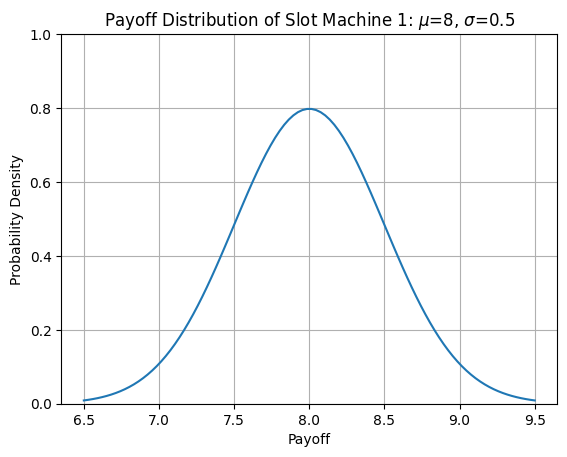

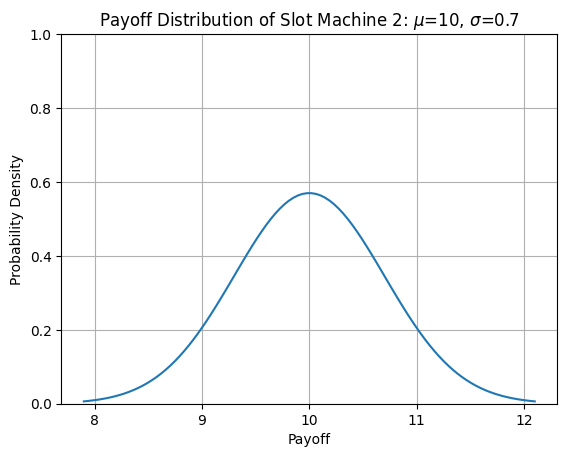

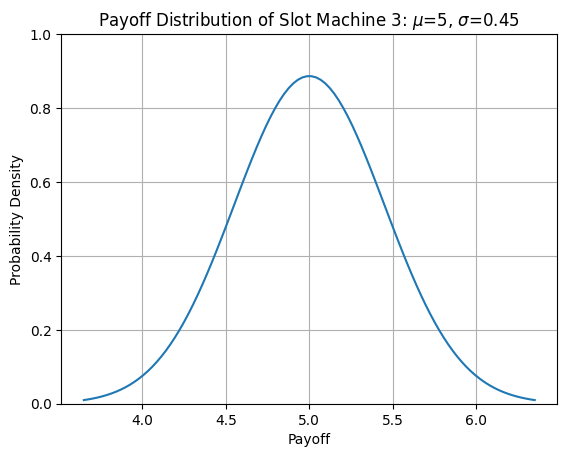

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of slot machines (arms)
K = 3

# Payoff distribution parameters for each slot machine
payoff_params = [
    {"mean": 8, "std_dev": 0.5},
    {"mean": 10, "std_dev": 0.7},
    {"mean": 5, "std_dev": 0.45}
]

# Plot payoff distribution of each slot machine
for slot_machine in range(K):
    x = np.linspace(payoff_params[slot_machine]["mean"] - 3 * payoff_params[slot_machine]["std_dev"],
                    payoff_params[slot_machine]["mean"] + 3 * payoff_params[slot_machine]["std_dev"], 100)
    y = 1 / (payoff_params[slot_machine]["std_dev"] * np.sqrt(2 * np.pi)) * \
        np.exp(-(x - payoff_params[slot_machine]["mean"]) ** 2 / (2 * payoff_params[slot_machine]["std_dev"] ** 2))
    
    # Add legend for mean and standard deviation
    mean = payoff_params[slot_machine]["mean"]
    std_dev = payoff_params[slot_machine]["std_dev"]

    plt.figure()
    plt.plot(x, y)
    plt.title(f"Payoff Distribution of Slot Machine {slot_machine + 1}: " + f"$\mu$={mean}, " + f"$\sigma$={std_dev}")
    plt.xlabel("Payoff")
    plt.ylabel("Probability Density")
    plt.ylim(0, 1)
    plt.grid(True)    
    plt.show

### Solve MAB using three different strategies

* Explore only Strategy
* Exploit only Greedy Strategy
* $\epsilon$-greedy Strategy


In [2]:
# Number of trials
num_trials = 90

# Function to sample a payoff from a slot machine
def sample_payoff(slot_machine):
    return np.random.normal(payoff_params[slot_machine]["mean"], payoff_params[slot_machine]["std_dev"])

# Calculate the maximum possible reward
max_reward = max([payoff_params[i]["mean"] for i in range(K)])

### Explore only strategy

In [3]:
def explore_only():
    total_regret = 0
    for _ in range(num_trials):
        selected_machine = np.random.randint(K)  # Randomly select a slot machine
        reward = sample_payoff(selected_machine)  # Sample payoff from the selected slot machine
        regret = max_reward - reward
        total_regret += regret
    average_regret = total_regret / num_trials
    return average_regret

### Exploit only Greedy strategy

In [4]:
def exploit_only_greedy():
    total_regret = 0
    for _ in range(num_trials):
        selected_machine = np.argmax([payoff_params[i]["mean"] for i in range(K)])  # Select the slot machine with the highest mean payoff
        reward = sample_payoff(selected_machine)  # Sample payoff from the selected slot machine
        regret = max_reward - reward
        total_regret += regret
    average_regret = total_regret / num_trials
    return average_regret

### $\epsilon$-greedy strategy

In [5]:
def epsilon_greedy(epsilon):
    total_regret = 0
    for _ in range(num_trials):
        if np.random.random() < epsilon:
            selected_machine = np.random.randint(K)  # Randomly select a slot machine for exploration
        else:
            selected_machine = np.argmax([payoff_params[i]["mean"] for i in range(K)])  # Select the slot machine with the highest mean payoff for exploitation
        reward = sample_payoff(selected_machine)  # Sample payoff from the selected slot machine
        regret = max_reward - reward
        total_regret += regret
    average_regret = total_regret / num_trials
    return average_regret

### Upper Confidence Bound (UCB) strategy

In [6]:
def ucb(c):
    num_plays = np.zeros(K)
    sum_rewards = np.zeros(K)
    total_regret = 0

    # Play each slot machine once to initialize
    for i in range(K):
        reward = sample_payoff(i)
        num_plays[i] += 1
        sum_rewards[i] += reward

    # Continue playing with UCB strategy
    for t in range(K, num_trials):
        ucb_values = sum_rewards / num_plays + c * np.sqrt(np.log(t) / num_plays)
        selected_machine = np.argmax(ucb_values)
        reward = sample_payoff(selected_machine)
        num_plays[selected_machine] += 1
        sum_rewards[selected_machine] += reward
        optimal_reward = max_reward 
        regret = optimal_reward - reward
        total_regret += regret

    average_regret = total_regret / num_trials
    return average_regret

### Run the strategies and calculate average regrets

In [7]:
avg_regret_explore = explore_only()
avg_regret_exploit = exploit_only_greedy()
avg_regret_epsilon_greedy = epsilon_greedy(0.1)  # Set epsilon value for epsilon-greedy strategy
avg_regret_ucb = ucb(2)  # Set the value of the exploration parameter c for UCB strategy

### Print average regrets for each strategy

In [8]:
print(f"Average Regret - Explore only Strategy: {round(avg_regret_explore,4)}")
print(f"Average Regret - Exploit only Greedy Strategy: {round(avg_regret_exploit,4)}")
print(f"Average Regret - Epsilon-greedy Strategy: {round(avg_regret_epsilon_greedy,4)}")
print(f"Average Regret - UCB Strategy: {round(avg_regret_ucb,4)}")

Average Regret - Explore only Strategy: 2.246
Average Regret - Exploit only Greedy Strategy: 0.048
Average Regret - Epsilon-greedy Strategy: 0.3466
Average Regret - UCB Strategy: 0.0378


###  Note:

"Regret" does not obey the property of non-negativity. "Regret" in the context of multi-armed bandit problems is typically defined as the difference between the expected cumulative reward obtained by following a particular strategy and the maximum possible cumulative reward that could have been obtained by always choosing the best action.

In some cases, it is possible for the chosen strategy to achieve a cumulative reward that exceeds the maximum possible cumulative reward under hindsight knowledge. This can occur when the chosen strategy discovers a highly rewarding action or explores an unknown option that turns out to be more advantageous than expected.